In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['xtick.labelsize'] = '16'
plt.rcParams['ytick.labelsize'] = '16'
plt.rcParams['axes.labelsize'] = '18'
plt.rcParams['axes.titlesize'] = '18'

QB = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_QB.csv', 
                 names=['RANK', 'Player','PASS_CMP', 'PASS_ATT', 'PCT','PASS_YDS', 'PASS_Y/A', 'PASS_TD', 'PASS_INT', 'SACKS', 'RUSH_ATT', 'RUSH_YDS', 'RUSH_TD',
                          'FL', 'G', 'FPTS', 'FPTS/G', 'ROST'], skiprows=1, index_col=False, thousands=',').dropna()
RB = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_RB.csv',
                 names=['RANK', 'Player','RUSH_ATT', 'RUSH_YDS', 'RUSH_Y/A', 'RUSH_LG', 'RUSH_20+', 'RUSH_TD', 'REC', 'TGT', 'REC_YDS', 'REC_Y/R',
                        'REC_TD', 'FL', 'G', 'FPTS', 'FPTS/G', 'ROST'], skiprows=1, index_col=False, thousands=',').dropna()
WR = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_WR.csv',
                 names=['RANK', 'Player', 'REC', 'TGT', 'REC_YDS', 'REC_Y/R', 'REC_LG', 'REC_20+', 'REC_TD', 'RUSH_ATT', 'RUSH_YDS', 'RUSH_TD', 'FL', 
                        'G', 'FPTS', 'FPTS/G', 'ROST'],
                 skiprows=1, index_col=False, thousands=',').dropna()
TE = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_TE.csv',
                 names=['RANK', 'Player', 'REC', 'TGT', 'REC_YDS', 'REC_Y/R', 'REC_LG', 'REC_20+', 'REC_TD', 'RUSH_ATT', 'RUSH_YDS','RUSH_TD', 'FL', 
                        'G', 'FPTS', 'FPTS/G', 'ROST'],
                 skiprows=1, index_col=False, thousands=',').dropna()

team_stats = pd.read_csv('team_stats_2003_2023.csv')

In addition to the catalogs that we were working with last week, we also have a new catalog that I've added to the repo called "team_stats_2003_2023.csv". Before we dive in, let's take a quick look at what's contained in there.

In [65]:
team_stats

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2023,Carolina Panthers,2,15,0.118,236,416,-180,-10.6,17,...,7,4.0,111,103,845,36,25.0,11.1,-135.03,NaN
668,2023,San Francisco 49ers,12,5,0.706,491,298,193,11.4,17,...,27,4.8,147,101,933,29,45.3,10.1,231.48,NaN
669,2023,Los Angeles Rams,10,7,0.588,404,377,27,1.6,17,...,18,4.3,110,89,720,35,41.1,9.2,133.32,NaN
670,2023,Seattle Seahawks,9,8,0.529,364,402,-38,-2.2,17,...,11,4.1,93,111,954,35,38.8,8.4,62.33,NaN


For dataframes like this where there are so many columns that not all of them print, you can see them with the below command:

In [68]:
team_stats.columns

Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
       'points_opp', 'points_diff', 'mov', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot', 'ties'],
      dtype='object')

# Testing for correlation

Last week, we looked at all the ways that we can slice and dice pandas dataframes to study the differences between different populations--in this case, players. However, often what we're interested in isn't how two populations compare, but instead how two variables within a given population are related to each other. In the case of galaxies, this can be something like comparing the mass of a galaxy to its size--all galaxies aren't created equal, and astronomers have discovered that the most massive galaxies also tend to be the biggest.

The simplest way to test for the correlation between two variables is to calculate what's called a "Pearson r statistic". This is a measure of how much "y" changes when "x" also changes. The formula to measure r can be seen below:

![R Formula](r_formula.png)

This can be calculated using scipy (as we'll see below), so we don't need to worry about the details of how to measure it. Conceptually, we can just think of this as a measure of the association between two variables, with a value that is always between -1 and 1. If r>0, then "y" tends to get larger as "x" gets larger. If r<0, the opposite is true: "y" tends to get smaller as "x" gets larger. And if r is close to 0, the two variables don't have a very close relationship with one another. Let's take a look at an example of these cases.

First, let's think about the relationship between pass attempts (how many times a QB threw the ball) and pass completions (how many times a receiver caught a ball they threw). What do we think the relationship between those variables will look like? To visually see this, let's make a scatter plot.

Text(0.5, 0, 'Pass Attempts')

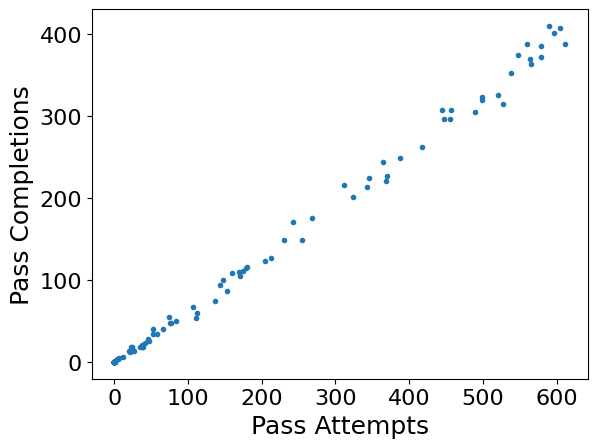

In [16]:
plt.plot(QB['PASS_ATT'], QB['PASS_CMP'], '.')
plt.ylabel('Pass Completions')
plt.xlabel('Pass Attempts')

We can clearly see that these two variables are correlated with one another--people who throw the ball more tend to also complete more passes in total. This is probably not very surprising, but now let's look at how we can quantify this relationship by measuring the correlation coefficient between these two variables.

In [17]:
from scipy.stats import spearmanr

spearmanr(QB['PASS_ATT'], QB['PASS_CMP'])

SignificanceResult(statistic=0.994267047707711, pvalue=9.650114004811407e-141)

This function returns two values, the "r statistic" and the "p value". We will get more into p-values during a later lesson, but conceptually, the smaller the value of p, the more likely it is that these two variables really are associated. But focusing on r, we can see that it is 0.99--almost equal to 1! So this statistic confirms what we saw by eye, pass attempts and pass completions are strongly positively correlated.

Now, let's think about what it means to be negatively correlated. The first example I could think of using our catalogs would be that I expect that the number of wins that a team has in a season goes down as the number of points they let their opponents score goes up. Let's take a look at that scatter plot:

Text(0.5, 0, 'Number of Points Allowed')

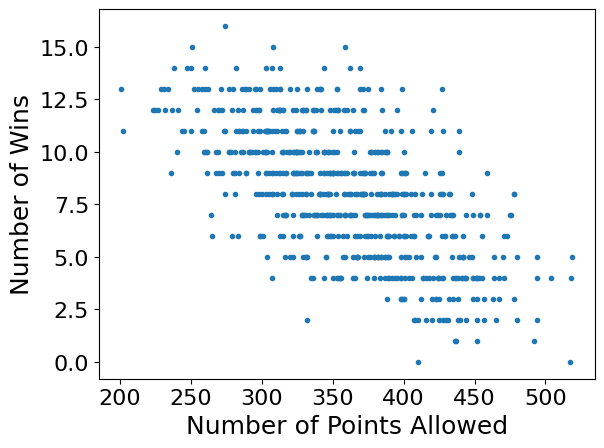

In [72]:
plt.plot(team_stats['points_opp'], team_stats['wins'], '.')
plt.ylabel('Number of Wins')
plt.xlabel('Number of Points Allowed')

This correlation isn't nearly as "tight" as the last one that we saw, but there is still a general trend where as points allowed goes up, wins goes down. Do we think this correlation coefficient will be stronger or weaker than the above case? Let's check!

In [73]:
spearmanr(team_stats['points_opp'], team_stats['wins'])

SignificanceResult(statistic=-0.6397243971965778, pvalue=1.266873528885216e-78)

Here, the spearman coefficient is indeed negative! But the lower value for the r coefficient also means that the correlation between these two variables is weaker. In the real world, very few variables are perfectly correlated with one another--there are often multiple factors that determine and outcome. Can we think of some in this case? Let's make a plot in the cell below with another variable that we think will be correlated with wins (hint: what is the opposite of "points allowed"?)

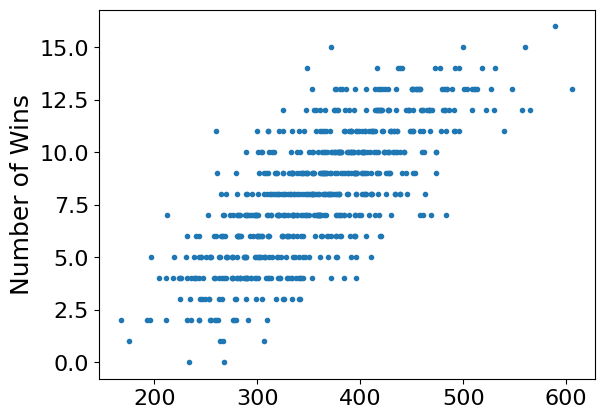

SignificanceResult(statistic=0.7498737949736378, pvalue=2.5341627723302743e-122)

In [74]:
plt.plot(team_stats[''], team_stats['wins'], '.')
plt.ylabel('Number of Wins')
plt.xlabel('')
plt.show()

spearmanr(team_stats[''], team_stats['wins'])

How can we interpret the statistics above? Crudely, the value of r^2 corresponds to "the fraction of the variance in the sample that is explained by the correlation that we are testing". Let's calculate r^2 for the two correlations we tested above and see what that means for our sample:

In [78]:
r_points_opp = spearmanr(team_stats['points_opp'], team_stats['wins'])[0]
r_points = spearmanr(team_stats['points'], team_stats['wins'])[0]

print('r^2 from opponent points:', r_points_opp**2)
print('r^2 from points:', r_points**2)

r^2 from opponent points: 0.40924730436852486
r^2 from points: 0.5623107083881654


So our interpretation is that scoring more points is more correlated with winning games than allowing fewer points! But they're both quite important and strongly corrlated with winning!

Now, let's take a look at a variable where there is little-to-no correlation. For this, we can use running backs, but first, let's limit ourselves to running backs who carried the ball at least 50 times (to remove all the people who basically never touched the ball). We did this last time with .query(), but it got a little bit annoying to have to call .query() over and over again. What we can do is define a new dataframe that has the cuts we'd like to apply, and then keep calling that. Let's do that here. First, the full RB dataframe:

In [94]:
RB

,RANK,Player,RUSH_ATT,RUSH_YDS,RUSH_Y/A,RUSH_LG,RUSH_20+,RUSH_TD,REC,TGT,REC_YDS,REC_Y/R,REC_TD,FL,G,FPTS,FPTS/G,ROST
0,1.0,Christian McCaffrey (SF),272.0,1459.0,5.4,72.0,19.0,14.0,67.0,83.0,564.0,8.4,7.0,2.0,16.0,324.3,20.3,100.0%
1,2.0,Raheem Mostert (MIA),209.0,1012.0,4.8,49.0,12.0,18.0,25.0,32.0,175.0,7.0,3.0,1.0,15.0,242.7,16.2,91.4%
2,3.0,Travis Etienne Jr. (JAC),267.0,1008.0,3.8,62.0,11.0,11.0,58.0,73.0,476.0,8.2,1.0,0.0,17.0,224.4,13.2,99.7%
3,4.0,Kyren Williams (LAR),228.0,1144.0,5.0,56.0,11.0,12.0,32.0,48.0,206.0,6.4,3.0,2.0,12.0,223.0,18.6,96.2%
4,5.0,Derrick Henry (BAL),280.0,1167.0,4.2,69.0,11.0,12.0,28.0,36.0,214.0,7.6,0.0,0.0,17.0,218.7,12.9,99.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,274.0,Tim Flanders (NO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%
274,275.0,Dwayne Washington (DEN),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0%
275,276.0,Terrell Jennings (NE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%
276,277.0,Jonathan Williams (FA),1.0,-2.0,-2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.2,-0.2,0.0%


And now let's define RB_50 with our cut:

In [95]:
RB_50 = RB.query('RUSH_ATT>50')

RB_50

,RANK,Player,RUSH_ATT,RUSH_YDS,RUSH_Y/A,RUSH_LG,RUSH_20+,RUSH_TD,REC,TGT,REC_YDS,REC_Y/R,REC_TD,FL,G,FPTS,FPTS/G,ROST
0,1.0,Christian McCaffrey (SF),272.0,1459.0,5.4,72.0,19.0,14.0,67.0,83.0,564.0,8.4,7.0,2.0,16.0,324.3,20.3,100.0%
1,2.0,Raheem Mostert (MIA),209.0,1012.0,4.8,49.0,12.0,18.0,25.0,32.0,175.0,7.0,3.0,1.0,15.0,242.7,16.2,91.4%
2,3.0,Travis Etienne Jr. (JAC),267.0,1008.0,3.8,62.0,11.0,11.0,58.0,73.0,476.0,8.2,1.0,0.0,17.0,224.4,13.2,99.7%
3,4.0,Kyren Williams (LAR),228.0,1144.0,5.0,56.0,11.0,12.0,32.0,48.0,206.0,6.4,3.0,2.0,12.0,223.0,18.6,96.2%
4,5.0,Derrick Henry (BAL),280.0,1167.0,4.2,69.0,11.0,12.0,28.0,36.0,214.0,7.6,0.0,0.0,17.0,218.7,12.9,99.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66.0,Pierre Strong Jr. (CLE),63.0,291.0,4.6,40.0,4.0,1.0,5.0,8.0,47.0,9.4,0.0,1.0,17.0,37.8,2.2,0.6%
66,67.0,Chris Rodriguez Jr. (WAS),51.0,247.0,4.8,16.0,0.0,2.0,2.0,2.0,12.0,6.0,0.0,1.0,11.0,35.9,3.3,1.3%
67,68.0,Cam Akers (MIN),60.0,167.0,2.8,19.0,0.0,2.0,11.0,12.0,70.0,6.4,0.0,0.0,7.0,35.7,5.1,9.2%
71,72.0,Matt Breida (FA),55.0,151.0,2.7,9.0,0.0,1.0,17.0,21.0,88.0,5.2,0.0,0.0,17.0,29.9,1.8,1.1%


Now let's compare the amount of rushing yards per attempt that running backs got with the number of receiving yards per attempt that they got. Since these skills are different than each other (and most running backs are good at both), my hypothesis is that these will only weakly be correlated.

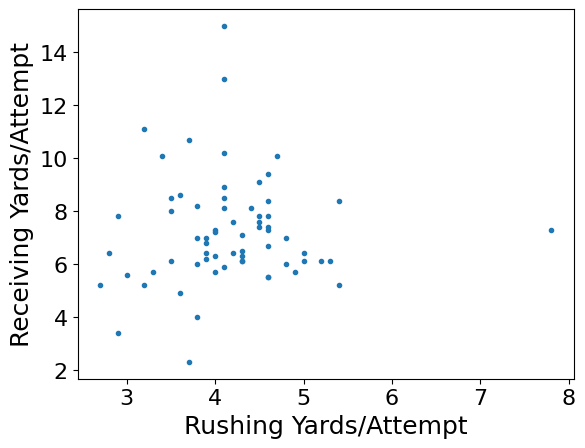

SignificanceResult(statistic=0.06458069634354228, pvalue=0.6064342634280193)

In [97]:
plt.plot(RB_50['RUSH_Y/A'], RB_50['REC_Y/R'], '.')
plt.xlabel('Rushing Yards/Attempt')
plt.ylabel('Receiving Yards/Attempt')
plt.show()

spearmanr(RB_50['RUSH_Y/A'], RB_50['REC_Y/R'])

The very low (r~0.06) statistic means that there is very little correlation between these variables, and you can tell that is the case by eye; the scatter plot looks to be distributed pretty randomly, with maybe a slight but small positive correlation. The p value being large (0.6) means that whatever correlation is there is not significant. In the future, we'll talk more about how to test that rigorously.

# Activity: Finding your own correlations

Use the catalogs to try to find:

1) a positive correlation
2) a negative correlation
3) a null correlation

Hint: the player stat catalogs are full of positive correlations, while the team stats catalog is full of negative and null correlations.

# Fitting a line

Sometimes, we don't just want to measure whether or not two variables are correlated with one another, we also want to measure what the effect of changing one variable is on changing another. To do this, we fit a line to the data. A line takes the form:

$y = m x + b$

Where x is what is called the "independent variable", y is the "dependent variable", b is the y intercept, and m is the slope. The slope is usually the quantity we're the most interested in finding, because it tells us how much y changes if we change x by a certain amount. 

In the cell below, I've made a plot of a simple line. Play around with changing m and b to see how the line changes.

(0.0, 9.0)

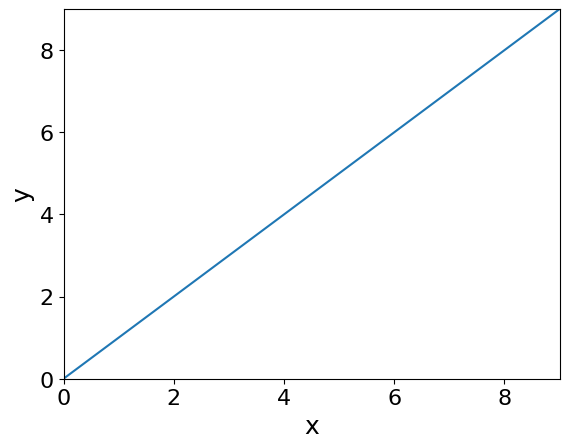

In [123]:
x_arr = np.arange(0, 10, 1)

m = 1
b = 0

y_arr =  m * x_arr + b

plt.plot(x_arr, y_arr)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(np.min(x_arr), np.max(x_arr))
plt.ylim(np.min(x_arr), np.max(x_arr))

Now, let's fit a line to data. Let's try for the number of wins versus the number of points a team scores. We can take a look at the plot again below:

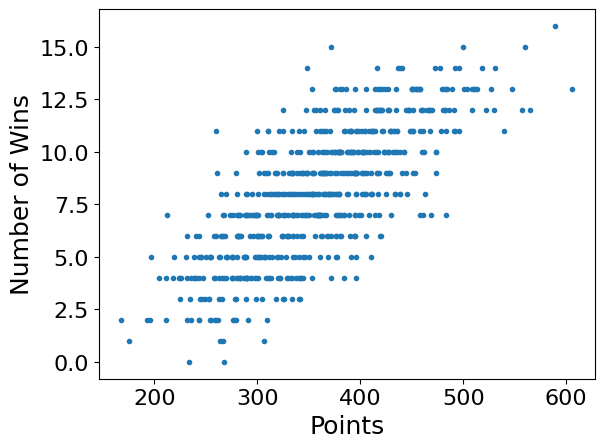

In [124]:
plt.plot(team_stats['points'], team_stats['wins'], '.')
plt.ylabel('Number of Wins')
plt.xlabel('Points')
plt.show()

We can fit a line using the scipy "linregress" function. All you have to do is feed it the x and y you would like to fit and it will return you the best fitting line to that data. This will return an object that we will store as a variable called "fit". Let's take a look:

In [128]:
from scipy.stats import linregress

fit = linregress(team_stats['points'], team_stats['wins'])

fit

LinregressResult(slope=0.03234002764296269, intercept=-3.54763592560907, rvalue=0.7537234842780693, pvalue=2.9155349391686313e-124, stderr=0.0010893890295986114, intercept_stderr=0.39849580350578895)

The results are all stored as values within that fit object. If we'd like to access them, we can do it as follows. Notice that you actually get the r value and p value for free when you measure this function!

In [129]:
fit.slope

0.03234002764296269

Now, let's take a look at the line that we fit. To plot the line, we need to define an array that spans the range that we want to plot. In this case, let's choose 200-600 points as the axis. Then, we just need to grab the slope and intercept values and plot it. Let's take a look:

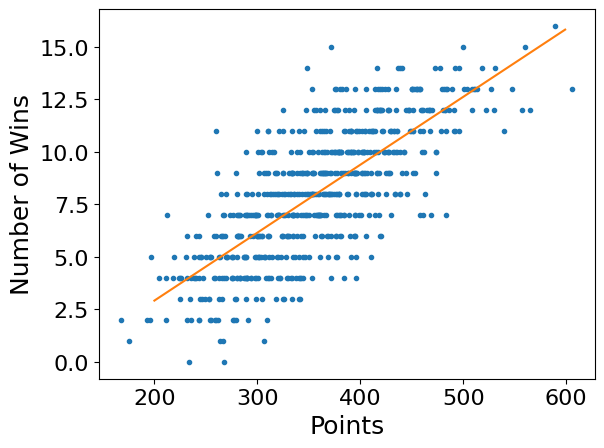

In [130]:
points_arr = np.arange(200, 600)
wins_arr = fit.slope * points_arr + fit.intercept


plt.plot(team_stats['points'], team_stats['wins'], '.')
plt.plot(points_arr, wins_arr)
plt.ylabel('Number of Wins')
plt.xlabel('Points')
plt.show()

Finally, let's interpret our results! The slope that we measure is approximately 0.03 wins/points. This means that every point that a team scores in a season gets them 0.03 extra wins. If a team scores 100 more points in a season, how many extra wins should they expect to get?

# Activity: fitting lines

For each of the correlations that you measured in the last activity, try fitting a line and measuring the slope. What does that slope tell us about the correlations?